# Assignment 2

During the exercises, you will compute the nonparametric bootstrap distribution of the Pearson’s
correlation coefficient between LSAT and GPA using B = 40000 bootstrap samples.

## Exercise 8.1: The Nonparametric Bootstrap

_Compute the nonparametric bootstrap distribution of the Pearson’s correlation coefficient between LSAT
and GPA using B = 40000 bootstrap samples._

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tqdm.notebook import tqdm

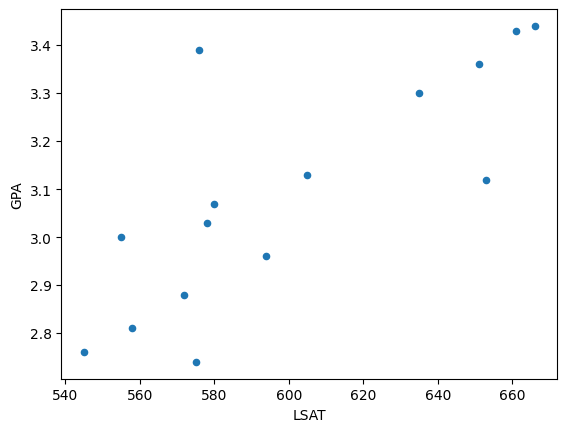

In [2]:
df = pd.read_csv("law.csv")
df.plot.scatter(x="LSAT", y="GPA")
plt.show()

In [3]:
np.corrcoef(df["LSAT"], df["GPA"])

array([[1.        , 0.77637449],
       [0.77637449, 1.        ]])

In [4]:
np.corrcoef(df.values.T)

array([[1.        , 0.77637449],
       [0.77637449, 1.        ]])

In [5]:
def bootstrap(data):
    return [random.choice(data) for _ in range(len(data))]

np.array(bootstrap(df.values)).shape, np.stack(bootstrap(df.values), axis=1).shape

((15, 2), (2, 15))

In [6]:
def bootstrap_df(df):
    return pd.DataFrame(bootstrap(df.values), columns=df.columns)

bootstrap_df(df)

,LSAT,GPA
0,651.0,3.36
1,661.0,3.43
2,580.0,3.07
3,594.0,2.96
4,558.0,2.81
5,576.0,3.39
6,661.0,3.43
7,580.0,3.07
8,578.0,3.03
9,555.0,3.00


In [7]:
np.corrcoef(bootstrap_df(df).values.T)

array([[1.        , 0.68605033],
       [0.68605033, 1.        ]])

In [8]:
distribution = [np.corrcoef(bootstrap_df(df).values.T)[0][1] for _ in range(40_000)]

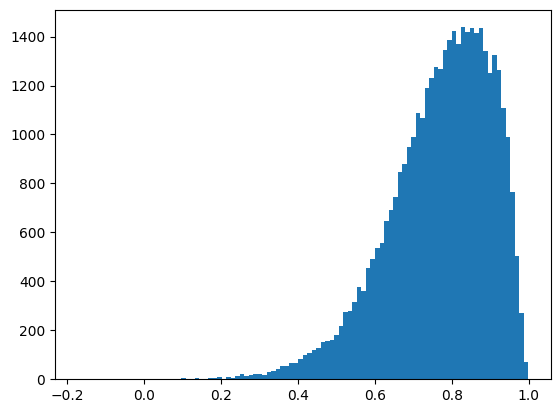

In [9]:
plt.hist(distribution, bins=100)
plt.show()

In this assignment, work on these additional tasks:

## 1. Complete enumeration bootstrap

_Recompute using the complete enumeration bootstrap._

From https://docs.python.org/3/library/itertools.html:

![](img/itertools.png)

In [10]:
from itertools import combinations_with_replacement

n = len(df)
enumeration = list(combinations_with_replacement(list(range(n)), n))
len(enumeration)

77558760

```python
data = df.values
corrcoefs = []
for e in tqdm(enumeration):
    c = np.corrcoef(data[list(e)].T)
    corrcoefs.append(c[0][1])
pd.DataFrame(corrcoefs).to_csv("complete_enumeration_corrcoefs.csv", index=False)
```

We run this externally in [`complete_enumeration.py`](complete_enumeration.py). The resulting CSV is of size 1.3 GB, so we do not include it in the repo.

In [ ]:
import os

df_path = "complete_enumeration_corrcoefs.csv"
if os.path.exists(df_path):
    complete_enumeration_df = pd.read_csv(df_path)
    fig, ax = plt.subplots()
    complete_enumeration_df.hist(bins=100, alpha=0.5, color="red", ax=ax, label="complete enumeration", density=True)
    ax.hist(distribution, bins=100, alpha=0.5, color="blue", label="bootstrap B = 40 000", density=True)
    ax.legend(loc='upper left')
    plt.savefig("img/complete_enumeration_vs_bootstrap.png")
    plt.close()

![](img/complete_enumeration_vs_bootstrap.png)

## 2. Gray codes

_Use Gray codes for compositions to speedup computations._

In [ ]:
def gray_codes(current_composition, i, d, p, n, k):
    """On a generic call, input consist of the current composition pi = (pi(1), ..., pi(k)), the pointers i and d and a pointer p indicating 
    the first positive part of pi.
    Output consists of the successor pi' of pi and updated pointers i, d, and p
    """
    if not current_composition:  # first entry
        current_composition = np.zeros(k)
        current_composition[0] = n
        if current_composition[k-1] == n:
            return current_composition
        return  # TODO
    # later entries
    if p == 1:
        b = np.argmax(current_composition[np.argmax(current_composition>0) + 1 :] > 0) + 1 # because we have zero indexing, position of second positive part
        if b == 2:
            if d == current_composition[0] == 1:
                p = 2
        elif (n - current_composition[0]) % 2 == 0:
            d = 1
            i = 2
            p = 2
        elif current_composition[b-1] % 2 == 1:
            d=1
            i=b
            p=b
        else:
            i=1
            d=b
    else:
        if (n - current_composition[p-1] % 2 == 1):
            d = p
            i = p - 1
            if current_composition[p-1] % 2 == 0:
                i = 1
            p = i
        elif current_composition[p] % 2 == 0:
            i = p + 1
            d = p
            if current_composition[p-1] == 1:
                p += 1
        else:
            i = p
            d = p+1
    current_composition[i-1] += 1
    current_composition[d-1] -= 1
    if current_composition[0] > 0:
        p = 1
    if current_composition[k-1] == n:
        return current_composition
    return  # TODO: another iteration here?


## 3. Speedup from Gray codes

_How much speedup can you get by using Gray codes? Show either experimentally or theoretically._

## 4. Removals

_Which observation(s) do you need to remove from the sample to make the Monte Carlo and complete enumeration bootstrap look more similar?_

## 5. Monte Carlo vs complete enumeration bootstrap

_Explain why you obtain difference results for Monte Carlo and complete enumeration bootstrap._